In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [96]:
fraud_transactions = pd.read_csv('./datasets/creditcard-modified.csv',index_col=0)
fraud_transactions.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
101565,67878.0,-0.641330,-0.057304,1.489998,-1.688131,-1.151043,0.259996,-1.391069,-2.334075,1.168644,...,-1.231634,0.257164,-0.371953,-0.038566,1.397514,-0.665947,0.031003,0.180357,100.00,0
260880,159763.0,2.023952,-0.120140,-1.086918,0.423019,-0.142901,-1.127752,0.178493,-0.303234,0.564509,...,-0.276175,-0.697708,0.335631,-0.017196,-0.324904,0.200023,-0.071566,-0.058224,16.99,0
214337,139631.0,-0.688944,1.292153,-0.564281,-1.457526,2.258333,-0.323270,1.678984,-0.104128,-1.285351,...,-0.006880,-0.171568,-0.720019,-0.419435,1.211991,0.670916,-0.103986,0.030084,8.95,0
201575,133944.0,2.119362,0.142639,-2.373337,0.541949,0.608419,-1.775564,0.955775,-0.599383,0.010420,...,0.264264,0.898266,-0.168063,0.059311,0.626949,0.729035,-0.129120,-0.094713,10.00,0
81055,58769.0,-5.584256,-4.732413,-0.448452,-0.121442,-0.707412,-0.114376,-1.554628,1.402126,-0.031693,...,0.041651,0.621789,0.223467,-0.770137,0.621182,-0.028738,0.505194,-1.898323,101.49,0


In [97]:
fraud_df=fraud_transactions.drop(columns=['Class'])
fraud_df.shape

(30000, 30)

In [98]:
#scaling the left out numerical features
std_scaler = StandardScaler()
fraud_df[['Time','Amount']] = std_scaler.fit_transform(fraud_df[['Time','Amount']])
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-1.124130,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.221189
49906,-1.066069,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.909989
29474,-1.250975,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.250634
276481,1.522278,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.380947
278846,1.550719,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.383641


In [99]:
pca = PCA(n_components=2)
pca_transform= pca.fit_transform(fraud_df)
pca_transform.shape

(30000, 2)

In [100]:
pca_transform

array([[17.23999105, -8.12385002],
       [ 0.26859569,  3.22321653],
       [-1.26546151,  0.49227376],
       ...,
       [-1.06457072, -0.21092977],
       [-1.30850113, -0.10369559],
       [-0.60568803,  0.497831  ]])

Text(0, 0.5, 'Second principle component')

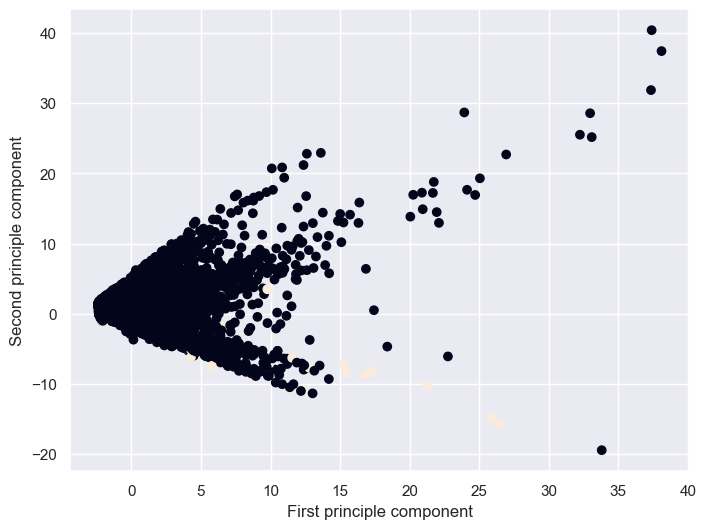

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(pca_transform[:,0],pca_transform[:,1],c=fraud_transactions['Class'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [102]:
transformed_df = pd.DataFrame(pca_transform,columns=['x','y'])

In [103]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='k-means++',n_init=15)


In [104]:
X = transformed_df
kmeans_transformed = kmeans.fit_transform(X)

In [105]:
kmeans.cluster_centers_

array([[ 1.26387665, -0.71273742],
       [-1.31125915,  0.73945781]])

In [106]:
kmeans_transformed[:10]

array([[17.61138328, 20.55984216],
       [ 4.05984208,  2.94363698],
       [ 2.80171439,  0.2513909 ],
       [ 1.39672914,  2.63963736],
       [ 3.57683268,  0.88733122],
       [ 0.79486352,  2.19210044],
       [ 3.56854471,  0.86232204],
       [ 1.08851423,  2.61350234],
       [ 3.62292448,  0.99066025],
       [ 6.35567058,  7.8469376 ]])

In [107]:
kmeans.labels_[:10]

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int32)

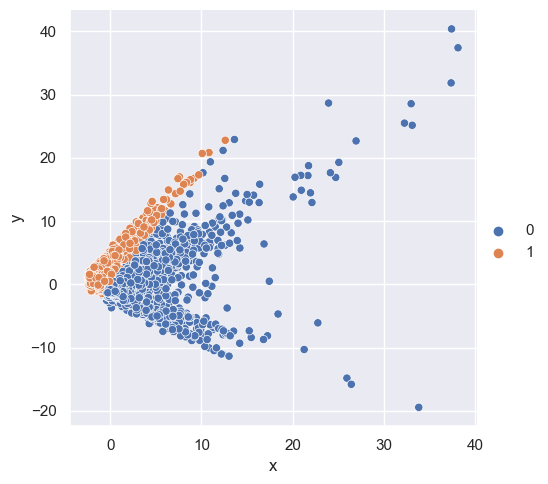

In [108]:
sns.relplot(data=transformed_df,x='x',y='y',hue=kmeans.labels_)

In [109]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.2, min_samples=50).fit(X)

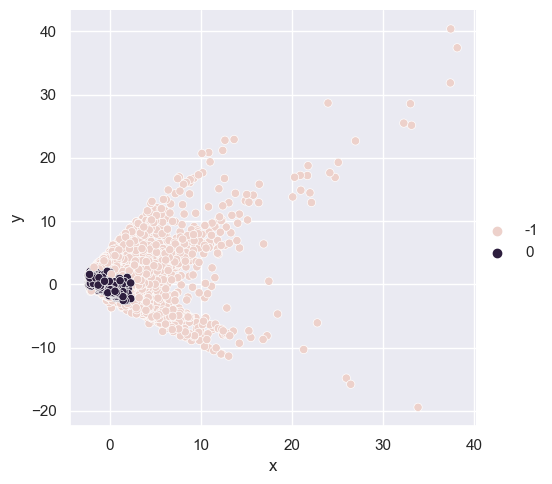

In [110]:
sns.relplot(data=X,x='x',y='y',hue=dbs.labels_)